Script utilizado para procesar la informacion particionada

In [ ]:

# this script access the public transport datasate provided by nestor (dataset folder)
# for each zip file (corresponding to each month), the code parse the compressed csv file
# all variables from the csv are parsed (fecha, tarjeta, corredor, linea, sentido)
# saving any csv from them is thus straightforward, and can be adapted for other cases
# this simple case saves the total ticket count per may of the week for each of the months

import zipfile
import csv
from io import TextIOWrapper
from datetime import datetime

# two dimensional output list (keys: week day, month - value: total ticket count)
numtickets = []

# iterate by month 1-12
for i in range(1, 13):

    # get list of csv file in zip for this month
    print('processing month', i)
    zip_file = zipfile.ZipFile('dataset/boletos_2019-{:02d}.zip'.format(i), 'r')
    csv_list = zip_file.infolist()

    # add row for this mont in output list
    numtickets.append([0,0,0,0,0,0,0])

    # iterate for each day in month
    for csv_file in csv_list:

        print('processing', csv_file.filename)
        file = zip_file.open(csv_file.filename, 'r')
        csv_reader = csv.reader(TextIOWrapper(file, 'latin-1'), delimiter=';')

        # iterate for each ticket entry
        for r, row in enumerate(csv_reader):
            if r == 0:
                continue

            # get all variables from row
            fecha = datetime.strptime(row[0], '%d/%m/%Y %I:%M:%S %p')
            tarjeta = int(row[2])
            corredor = row[3]
            linea = row[4]
            sentido = row[5]
            
            # accumulate ticket for this entry
            numtickets[-1][int(fecha.strftime('%w'))] += 1

# save output list as csv
with open('numtickets-day-month.csv', 'w') as file:
    write = csv.writer(file)
    write.writerows(numtickets)

Script utilizado para graficar informacion conseguida

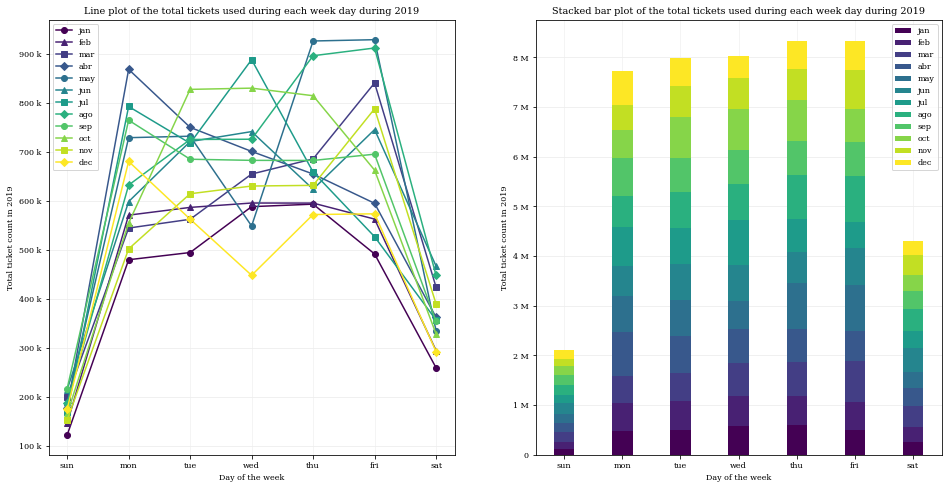

In [2]:

# this file plots the data parsed and saved by the numtickets-day-month-preprocessor script
# the code can be easily adapted to plot any other csv (e.g., classifications by bus line)

import csv

# read outlist from csv
with open("processed-data/numtickets-day-month.csv", 'r') as file:
    csv_reader = csv.reader(file, delimiter=',')
    numtickets = list(csv_reader)

# map to int
numtickets = [[int(num) for num in sub] for sub in numtickets]
    
# plot config: two plots side by side
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
font = {'family': 'serif',
        'weight': 'normal',
        'size': 8}
plt.rc('font', **font)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# colormap
from matplotlib import cm
color_map = cm.get_cmap('viridis', 12)

# plot 1) line plot
axs[0].grid(axis='x', which='both', color='0.95')
axs[0].grid(axis='y', which='major', color='0.93')
axs[0].grid(axis='y', which='minor', color='0.96')

# use k for thousends in y axis
axs[0].yaxis.set_major_formatter(ticker.EngFormatter())

axs[0].set_title("Line plot of the total tickets used during each week day during 2019")
axs[0].set_xlabel("Day of the week")
axs[0].set_ylabel("Total ticket count in 2019")
axs[0].xaxis.set_ticks([0,1,2,3,4,5,6,7])
axs[0].set_xticklabels(['','sun','mon','tue','wed','thu','fri','sat'])

# plot data from 12 months
axs[0].plot(range(1,8), numtickets[0], marker='o', color=color_map(0), label='jan')
axs[0].plot(range(1,8), numtickets[1], marker='^', color=color_map(1), label='feb')
axs[0].plot(range(1,8), numtickets[2], marker='s', color=color_map(2), label='mar')
axs[0].plot(range(1,8), numtickets[3], marker='D', color=color_map(3), label='abr')
axs[0].plot(range(1,8), numtickets[4], marker='o', color=color_map(4), label='may')
axs[0].plot(range(1,8), numtickets[5], marker='^', color=color_map(5), label='jun')
axs[0].plot(range(1,8), numtickets[6], marker='s', color=color_map(6), label='jul')
axs[0].plot(range(1,8), numtickets[7], marker='D', color=color_map(7), label='ago')
axs[0].plot(range(1,8), numtickets[8], marker='o', color=color_map(8), label='sep')
axs[0].plot(range(1,8), numtickets[9], marker='^', color=color_map(9), label='oct')
axs[0].plot(range(1,8), numtickets[10], marker='s', color=color_map(10), label='nov')
axs[0].plot(range(1,8), numtickets[11], marker='D', color=color_map(11), label='dec')

axs[0].legend()

# plot 2) stacked bar plot
axs[1].grid(axis='x', which='both', color='0.95')
axs[1].grid(axis='y', which='major', color='0.93')
axs[1].grid(axis='y', which='minor', color='0.96')

# use k for thousends in y axis
axs[1].yaxis.set_major_formatter(ticker.EngFormatter())

axs[1].set_title("Stacked bar plot of the total tickets used during each week day during 2019")
axs[1].set_xlabel("Day of the week")
axs[1].set_ylabel("Total ticket count in 2019")
axs[1].xaxis.set_ticks([0,1,2,3,4,5,6,7])
axs[1].set_xticklabels(['','sun','mon','tue','wed','thu','fri','sat'])

# plot data from 12 months
width = 0.35 
axs[1].bar(range(1,8), numtickets[0], width, color=color_map(0), zorder=10, label='jan')
bottom = numtickets[0]
axs[1].bar(range(1,8), numtickets[1], width, color=color_map(1), zorder=10, label='feb', bottom=bottom)
bottom = [a + b for a, b in zip(bottom, numtickets[1])]
axs[1].bar(range(1,8), numtickets[2], width, color=color_map(2), zorder=10, label='mar', bottom=bottom)
bottom = [a + b for a, b in zip(bottom, numtickets[2])]
axs[1].bar(range(1,8), numtickets[3], width, color=color_map(3), zorder=10, label='abr', bottom=bottom)
bottom = [a + b for a, b in zip(bottom, numtickets[3])]
axs[1].bar(range(1,8), numtickets[4], width, color=color_map(4), zorder=10, label='may', bottom=bottom)
bottom = [a + b for a, b in zip(bottom, numtickets[4])]
axs[1].bar(range(1,8), numtickets[5], width, color=color_map(5), zorder=10, label='jun', bottom=bottom)
bottom = [a + b for a, b in zip(bottom, numtickets[5])]
axs[1].bar(range(1,8), numtickets[6], width, color=color_map(6), zorder=10, label='jul', bottom=bottom)
bottom = [a + b for a, b in zip(bottom, numtickets[6])]
axs[1].bar(range(1,8), numtickets[7], width, color=color_map(7), zorder=10, label='ago', bottom=bottom)
bottom = [a + b for a, b in zip(bottom, numtickets[7])]
axs[1].bar(range(1,8), numtickets[8], width, color=color_map(8), zorder=10, label='sep', bottom=bottom)
bottom = [a + b for a, b in zip(bottom, numtickets[8])]
axs[1].bar(range(1,8), numtickets[9], width, color=color_map(9), zorder=10, label='oct', bottom=bottom)
bottom = [a + b for a, b in zip(bottom, numtickets[9])]
axs[1].bar(range(1,8), numtickets[10], width, color=color_map(10), zorder=10, label='nov', bottom=bottom)
bottom = [a + b for a, b in zip(bottom, numtickets[10])]
axs[1].bar(range(1,8), numtickets[11], width, color=color_map(11), zorder=10, label='dec', bottom=bottom)

axs[1].legend()

# save figure
plt.savefig("processed-data/numtickets-day-month.png", format='png')
plt.savefig("processed-data/numtickets-day-month.pdf", format='pdf')




